In [1]:
import os
import numpy as np
import pandas as pd
import nltk
from nltk import corpus, tokenize
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Create objects
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Download required NLTK datasets
nltk.download('punkt')
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ramya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [3]:
df = pd.read_csv(r"C:\Users\ramya\5sem\NLP\project\Dataset-SA.csv", sep=',')
df.columns

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')

In [4]:
df['Sentiment'].value_counts()

Sentiment
positive    166581
negative     28232
neutral      10239
Name: count, dtype: int64

In [5]:
sia.polarity_scores(df.loc[0]['Review'])

{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.636}

In [6]:
df.loc[0]['Review']

'super!'

In [7]:
df.shape

(205052, 6)

In [8]:
df.isnull().sum()

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [9]:
df = df[df.Sentiment.isin(['neutral']) == False]

In [10]:
df['Sentiment'].value_counts()

Sentiment
positive    166581
negative     28232
Name: count, dtype: int64

In [11]:
df = df.fillna(df.mode().iloc[0])
df.head()

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive


In [12]:
df.isnull().sum()

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [13]:
df['scores']=df['Review'].apply(lambda review:sia.polarity_scores(review))

In [14]:
df.head(5)

,product_name,product_price,Rate,Review,Summary,Sentiment,scores
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,"{'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'comp..."
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."


In [15]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])


In [16]:
df['comp_scores'] = df['compound'].apply(lambda c: 'positive' if c >= 0 else 'negative')

In [17]:
df.head(5)

,product_name,product_price,Rate,Review,Summary,Sentiment,scores,compound,comp_scores
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6360,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6249,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.3182,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,"{'neg': 0.737, 'neu': 0.263, 'pos': 0.0, 'comp...",-0.4215,negative
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.6249,positive


In [18]:
df['Sentiment'].value_counts()

Sentiment
positive    166581
negative     28232
Name: count, dtype: int64

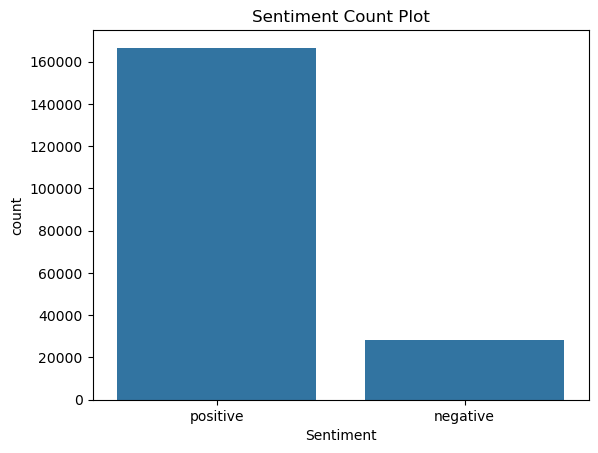

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sentiment', data=df)
plt.title("Sentiment Count Plot")
plt.show()


In [20]:
from tqdm import tqdm
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))  # define once for efficiency
preprocessed_reviews = []

for sentence in tqdm(df['Review'].values):
    # Keep only letters
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)
    
    # Remove stopwords & lowercase
    words = [word.lower() for word in sentence.split() if word.lower() not in stop_words]
    
    # Join words back to sentence
    preprocessed_reviews.append(' '.join(words))

100%|██████████████████████████████████████████████████████████████████████| 194813/194813 [00:01<00:00, 167151.44it/s]


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf = TfidfVectorizer()
x = tfidf.fit_transform(preprocessed_reviews).toarray()

print(pd.DataFrame(x).shape)

(194813, 1121)


In [22]:
df['Sentiment'] = df['Sentiment'].astype('category')
df['Sentiment'] = df['Sentiment'].cat.codes

In [23]:
df['Sentiment'].value_counts()

Sentiment
1    166581
0     28232
Name: count, dtype: int64

In [25]:
pd.DataFrame(x).head()


,0,1,2,3,4,5,6,7,8,9,...,1111,1112,1113,1114,1115,1116,1117,1118,1119,1120
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,df['Sentiment'],test_size=0.25,random_state=1)

In [50]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)

MultinomialNB()

In [51]:
y_pred=nb_model.predict(x_train)
y_pred = nb_model.predict(x_test)

In [52]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[ 4316  2666]
 [  427 41295]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.62      0.74      6982
           1       0.94      0.99      0.96     41722

    accuracy                           0.94     48704
   macro avg       0.92      0.80      0.85     48704
weighted avg       0.94      0.94      0.93     48704

Accuracy: 0.9364939224704336


In [53]:
print('Accuracy of the model: {0}%'.format(accuracy_score(y_test, y_pred)*100))

Accuracy of the model: 93.64939224704337%


In [60]:
x_new = tfidf.transform(['This product is very bad '])
nb_model.predict(x_new) 

array([0], dtype=int8)